# Avaliação: Implementação de Filtros Digitais
## Alunos: Ariel Andrade e Pedro Augusto

### Enunciado (projeto 3):
- Projete um filtro FIR passa-baixas, de fase linear, pelo método da janela. Deseja-se uma freuência de corte (−6dB) igual a $ω_c = π/2$, uma atenuação mı́nima na banda rejeitada maior ou igual a 50dB e uma região de transição $∆ω < 0,1π$. Empregue janela de Kaiser. Implemente o filtro nas formas direta e em cascata.Represente os coeficientes em ponto flutuante (ex.: $0,00423578 = 0, 23578 × 10^2$) e vá diminuindo o número de casas decimais após a vı́rgula nas formas direta e em cascata para verificar a sensibilidade à quantização de parâmetros. 
<br> 
- Trace a curva do módulo da resposta em frequência em dB e da fase da resposta em frequência para os casos de precisão infinita e precisão finita. Em seguida, para a representação em forma direta, refaça os filtros com as 3 transformações em frequência a seguir $(Z^{-1} = −z^{−1} ; Z^{−1} = z^{−2}; Z^{−1} = −z^{−2} )$ e trace a curva do módulo em dB e da fase da da resposta em frequência resultante. Use os seus filtros para processar um sinal de áudio de sua preferência, ouça os resultados e os avalie perceptualmente. Avalie, também, o espectro em função do tempo, do sinal de entrada e de saída utilizando um espectrograma.

#### Importando bibliotecas

In [111]:
import numpy as np
from scipy import signal, misc
import scipy.io.wavfile
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
import scipy.io.wavfile as wavfile
from IPython.display import Audio
warnings.filterwarnings("ignore")

#### Parâmetros do filtro
- Frequência de corte: $\omega_c = \frac{\pi}{2}$ <br>
- Região de transição: $\Delta \omega = 0.1\pi$ <br>
- Amplitude da região de passagem: maior que $-6 dB$ <br>
- Amplitude da região de corte: menor que $-50 dB$ <br>
- Janela de Kaiser
- Frequência de amostragem: definimos $f_S = 44100Hz$ para que possamos filtrar um áudio com esta frequência.*italicized text*

In [95]:
fs = 44100
f_corte = fs / 4 # wc = pi / 2
largura_passagem = 0.1 #  ∆ω < 0.1pi
atenuacao = 50 # Atenuação em na banda de rejeição

largura_janela, beta = signal.kaiserord(atenuacao, largura_passagem) # Define a janela de Kaiser

b = signal.firwin(largura_janela, f_corte, window=('kaiser', beta), fs=fs) # Coeficientes da forma direta baseado de uma janela FIR por método da janela.

sos = signal.tf2sos(b, 1) # Obtendo coeficientes de segunda ordem do método cascata

plt.stem(np.arange(b.size / 2 * (-1), b.size / 2), b, use_line_collection=True)
plt.xlabel('x - Amostras')
plt.ylabel('y')
plt.title('Filtro FIR construído pela janela Kaiser - h[n]')
plt.show()

#### Funções para plotar sistema em cascata e em forma direta

In [96]:
# Plotagem sistema em cascata
def plot_cascata (sos, title):
    ws, hs = signal.sosfreqz(sos)
    plot_wh(ws, hs, title)

# Plotagem sistema direto
def plot_direta(b, a, title):
    w, h = signal.freqz(b, a)
    plot_wh(w, h, title)
    
def plot_wh(w, h, title):
    fig, ax1 = plt.subplots()
    ax1.set_title(title)
    ax1.plot(w, 20 * np.log10(abs(h)), 'b')
    ax1.set_ylabel('Amplitude [dB]', color='b')
    ax1.set_xlabel('Frequência [rad/amostra]')
    ax2 = ax1.twinx()
    angles = np.unwrap(np.angle(h))
    ax2.plot(w, angles, 'g')
    ax2.set_ylabel('Fase (radianos)', color='g')
    ax2.grid()
    ax2.axis('tight')
    ax1.set_ylim(bottom=-100)
    ax2.set_ylim(bottom=-50)
    plt.show()

#### Plotagem da resposta em frequência do filtro com precisão infinita

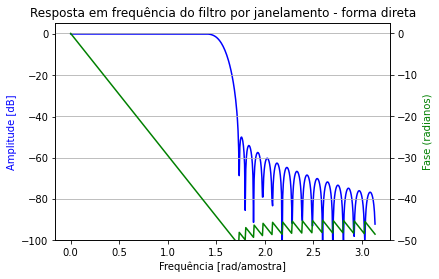

In [97]:
plot_direta(b, 1, 'Resposta em frequência do filtro por janelamento - forma direta')
plot_cascata(sos, 'Resposta em frequência do filtro por janelamento - forma cascata')

#### Truncagem dos coeficientes dos filtros

Exemplo de truncagem
Original: -0.0010685891040922988
Truncado: -0.001069


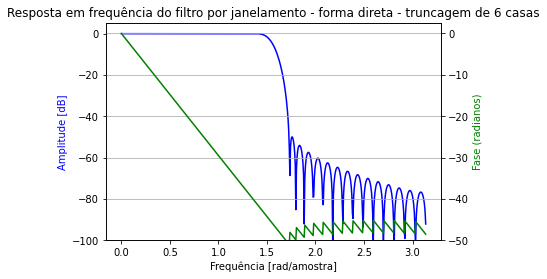

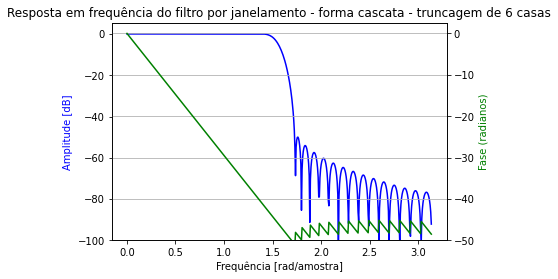

Exemplo de truncagem
Original: -0.0010685891040922988
Truncado: -0.00107


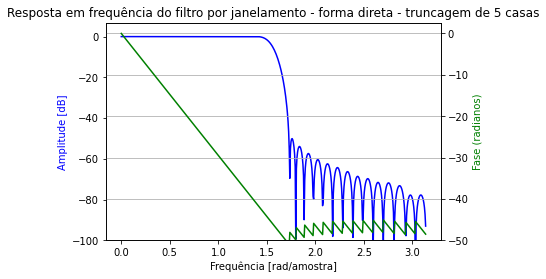

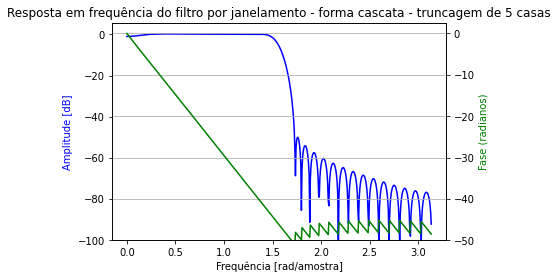

Exemplo de truncagem
Original: -0.0010685891040922988
Truncado: -0.0011


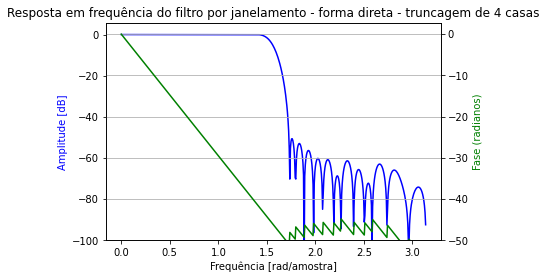

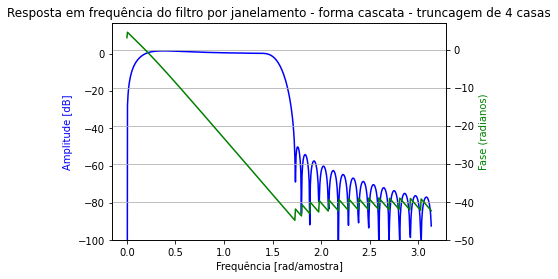

Exemplo de truncagem
Original: -0.0010685891040922988
Truncado: -0.001


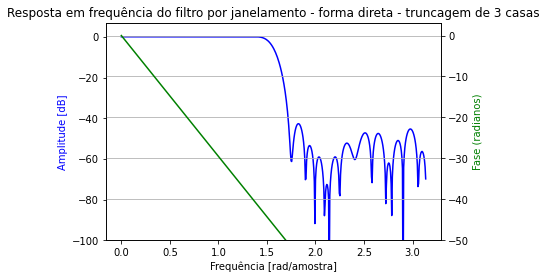

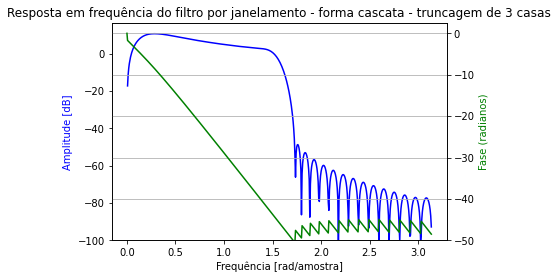

In [98]:
# Truncando de 6 até 3 casas
for x in range (6, 2, -1):
    truncagem_string = "truncagem de {} casas".format(x)
    rounded_sos = np.round(sos, x)
    rounded_b = np.round(b, x)
    print("Exemplo de truncagem")
    print("Original:", b[3])
    print("Truncado:", rounded_b[3])
    plot_direta(rounded_b, 1, 'Resposta em frequência do filtro por janelamento - forma direta - ' +  truncagem_string)
    plot_cascata(rounded_sos, 'Resposta em frequência do filtro por janelamento - forma cascata - ' +  truncagem_string)

#### Transformação $Z^{-1} = -z^{-1}$
Para realizar esta transformação, invertemos o sinal de todos os coeficientes <b>b</b> que estejam multiplicando o termo $z^{-\alpha}$ para todo $\alpha$ ímpar.

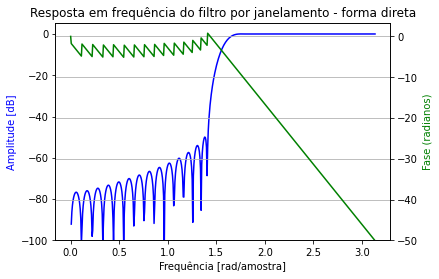

In [99]:
b_t1 = np.zeros(len(b))

# Inversão dos coeficientes ímpares
for i in range(len(b)):
    if i%2 == 0:
      b_t1[i] = b[i]
    else:
      b_t1[i] = -b[i]

plot_direta(b_t1, 1, 'Resposta em frequência do filtro por janelamento - forma direta')

#### Transformação $Z^{-1} = z^{2}$


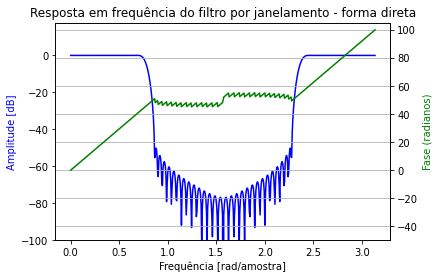

In [156]:
b_t2 = np.zeros(2 * len(b))

for x in range(2 * len(b)):
    if x%2 == 0:
      b_t2[x] = b[59 - int(x/2)]

a_t2 = np.zeros(2 * len(b))
a_t2[2*len(b) - 2] = 1.
a_t2[0] = 0.0000001

plot_direta(b_t2, a_t2, 'Resposta em frequência do filtro por janelamento - forma direta')

#### Transformação $Z^{-1} = -z^{-2}$

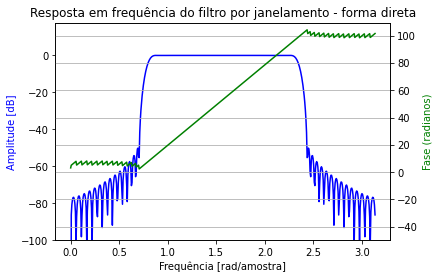

In [157]:
b_t3 = np.zeros(2 * len(b))

for x in range(2 * len(b)):
  if x%2 == 0:
    if x%4 == 0:
      b_t3[x] = b[59 - int(x/2)]
    else:
      b_t3[x] = -b[59 - int(x/2)]
      
      

a_t3 = np.zeros(2 * len(b))
a_t3[2*len(b) - 2] = 1.
a_t3[0] = 0.0000001

plot_direta(b_t3, a_t3, 'Resposta em frequência do filtro por janelamento - forma direta')

#### Processamento de áudio no filtro passa-baixa inicial


In [169]:
filename = './sweep_frequency.wav'
#filename = './dilyk.wav'

sample_rate, source_audio = wavfile.read(filename)

if len(source_audio.shape) == 2:
  source_audio_L = source_audio.sum(axis=1) / 2;
else:
  source_audio_L = source_audio

Audio(filename=filename, autoplay=False)

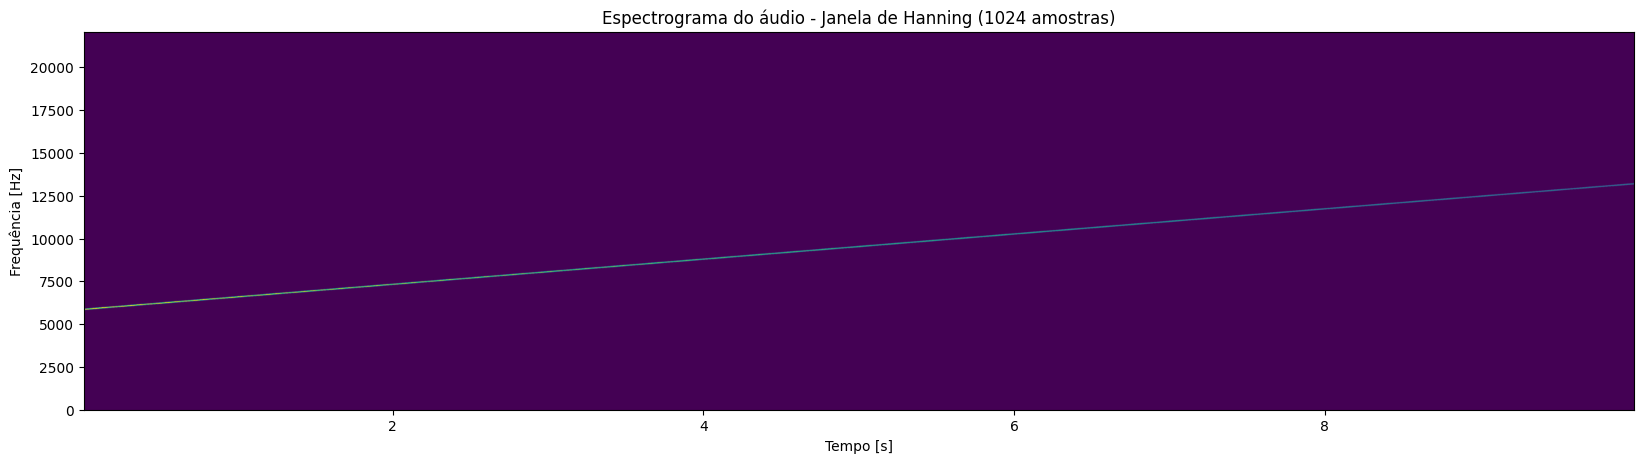

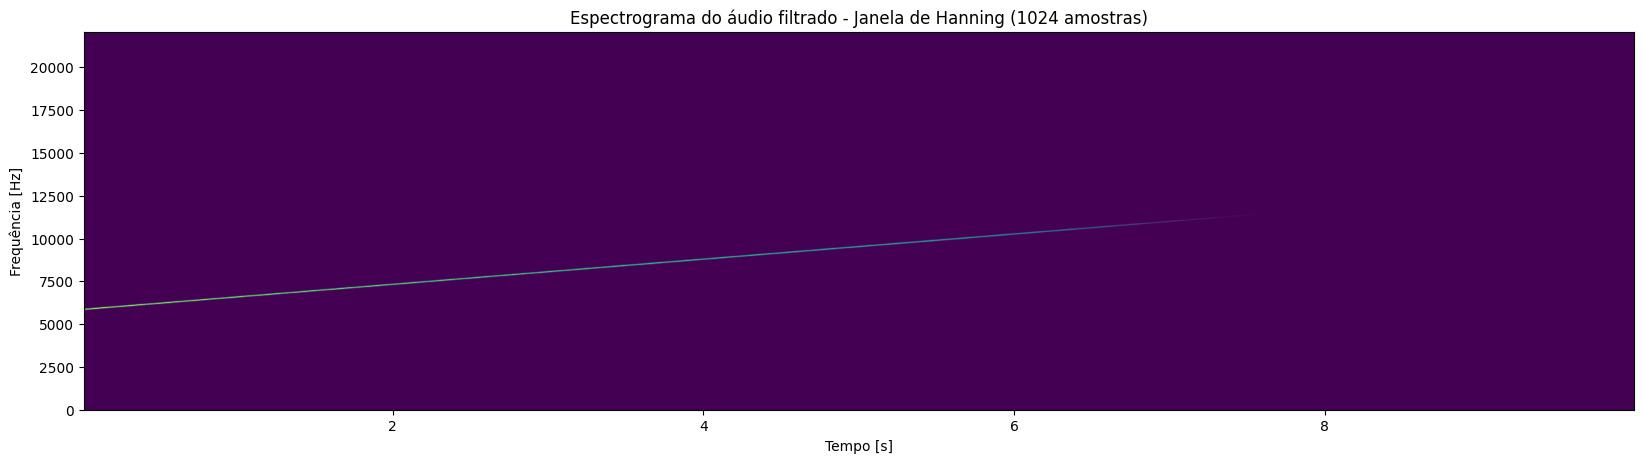

In [170]:
fs = sample_rate
window_size = 1024
window_type = 'hann'

f, t, Sxx = signal.spectrogram(source_audio_L, fs, nperseg=window_size, window=window_type)
figure(num=None, figsize=(20,5), dpi=100, facecolor='w', edgecolor='k')
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')
plt.title(f"Espectrograma do áudio - Janela de Hanning ({window_size} amostras)")
plt.show()


# Aplicando o filtro nos sinais de áudio
filtered_audio_L = signal.lfilter(b, [1.0], source_audio_L)

fs = sample_rate
window_size = 1024
window_type = 'hann'

f, t, Sxx = signal.spectrogram(filtered_audio_L, fs, nperseg=window_size, window=window_type)
figure(num=None, figsize=(20,5), dpi=100, facecolor='w', edgecolor='k')
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')
plt.title(f"Espectrograma do áudio filtrado - Janela de Hanning ({window_size} amostras)")
plt.show()

# Juntando os canais de áudio
output_audio = np.array(filtered_audio_L, dtype=np.int16)

output_file = "./output_filtered_audio.wav"
wavfile.write(output_file, sample_rate, output_audio.astype(np.int16))
Audio(filename=output_file, autoplay=False)

#### Processamento de áudio no filtro com transformação $Z^{-1} = -z^{-1}$



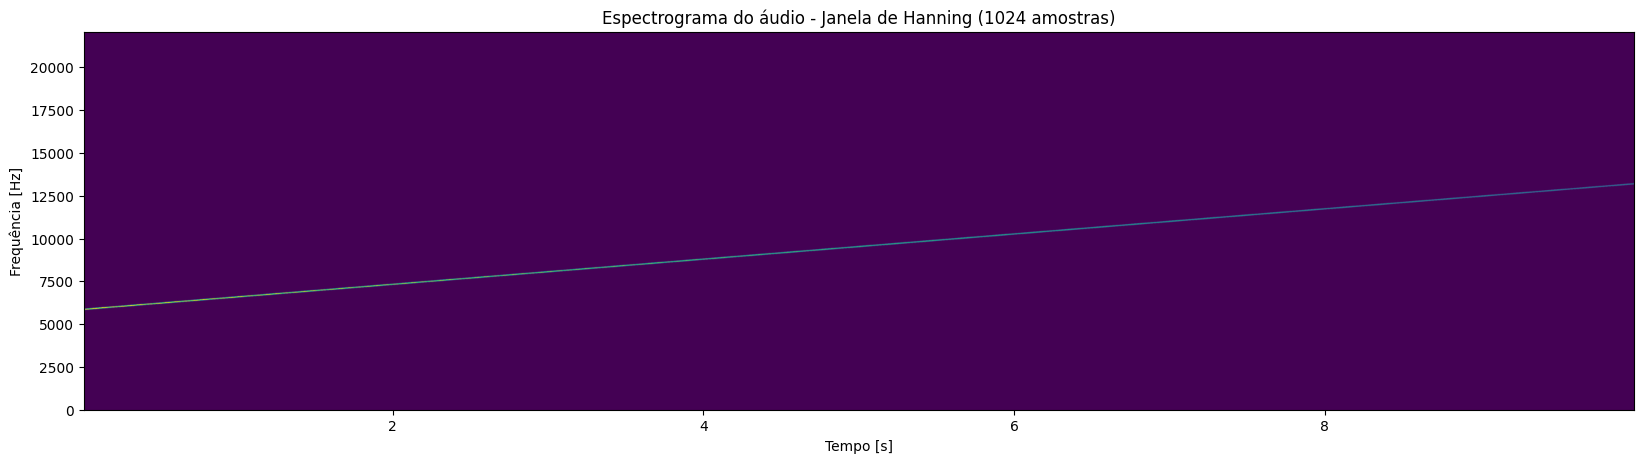

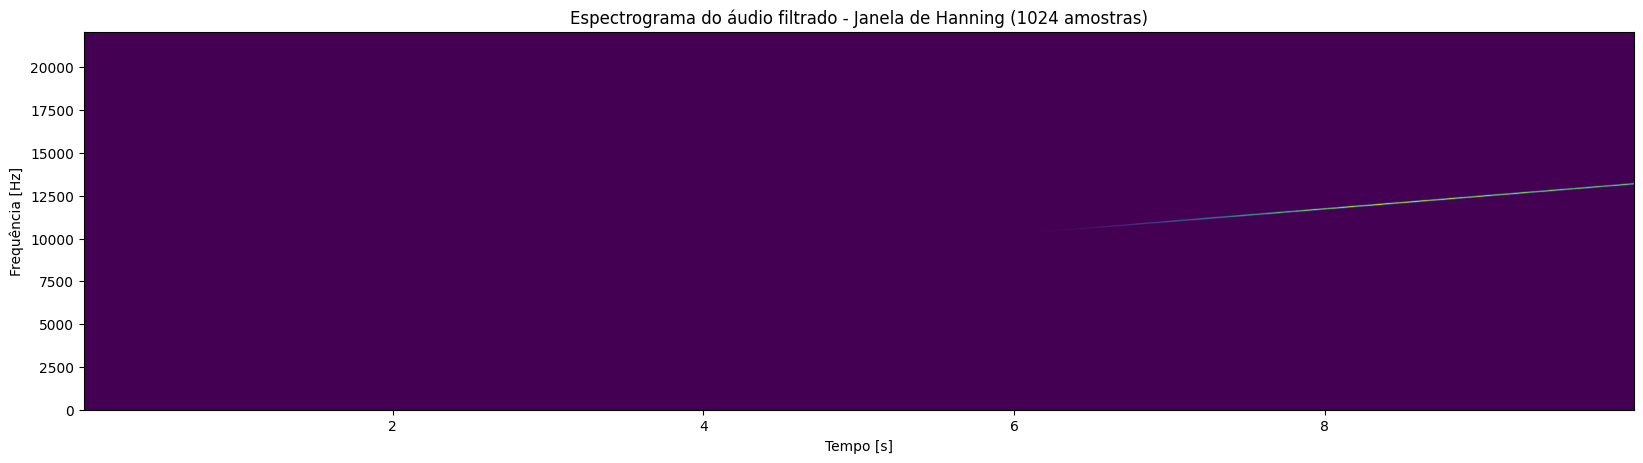

In [163]:
fs = sample_rate
window_size = 1024
window_type = 'hann'

f, t, Sxx = signal.spectrogram(source_audio_L, fs, nperseg=window_size, window=window_type)
figure(num=None, figsize=(20,5), dpi=100, facecolor='w', edgecolor='k')
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')
plt.title(f"Espectrograma do áudio - Janela de Hanning ({window_size} amostras)")
plt.show()


# Aplicando o filtro nos sinais de áudio
filtered_audio_L = signal.lfilter(b_t1, [1.0], source_audio_L)

fs = sample_rate
window_size = 1024
window_type = 'hann'

f, t, Sxx = signal.spectrogram(filtered_audio_L, fs, nperseg=window_size, window=window_type)
figure(num=None, figsize=(20,5), dpi=100, facecolor='w', edgecolor='k')
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')
plt.title(f"Espectrograma do áudio filtrado - Janela de Hanning ({window_size} amostras)")
plt.show()

# Juntando os canais de áudio
output_audio = np.array(filtered_audio_L, dtype=np.int16)

output_file = "./output_filtered_audio1.wav"
wavfile.write(output_file, sample_rate, output_audio.astype(np.int16))
Audio(filename=output_file, autoplay=False)

#### Processamento de áudio no filtro com transformação $Z^{-1} = z^{2}$

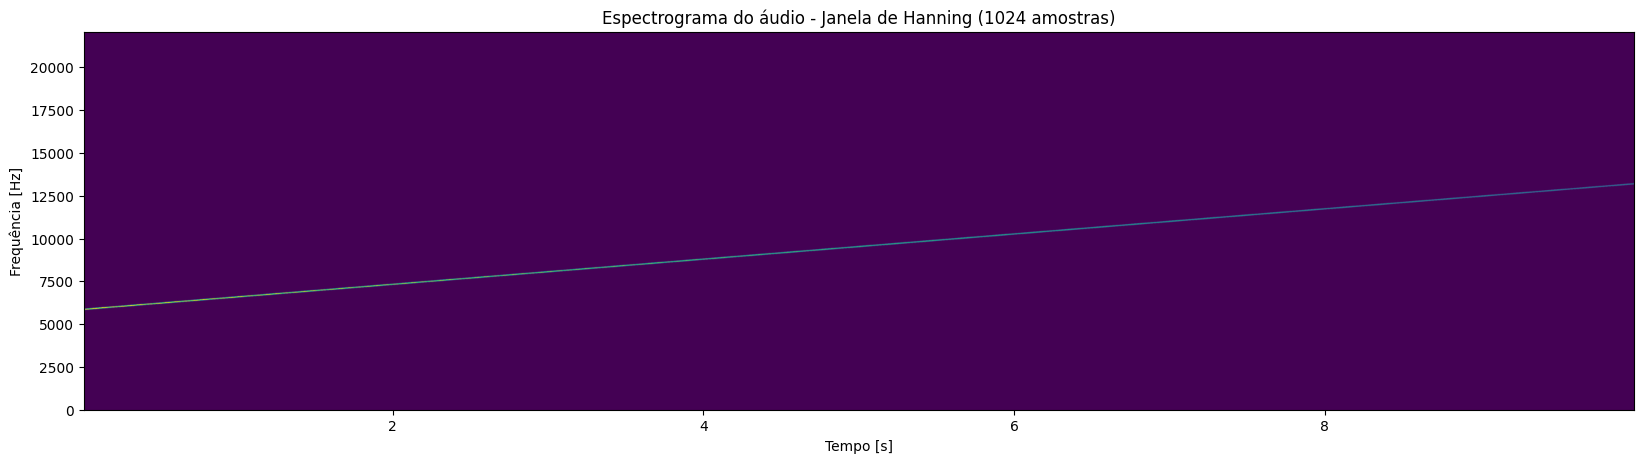

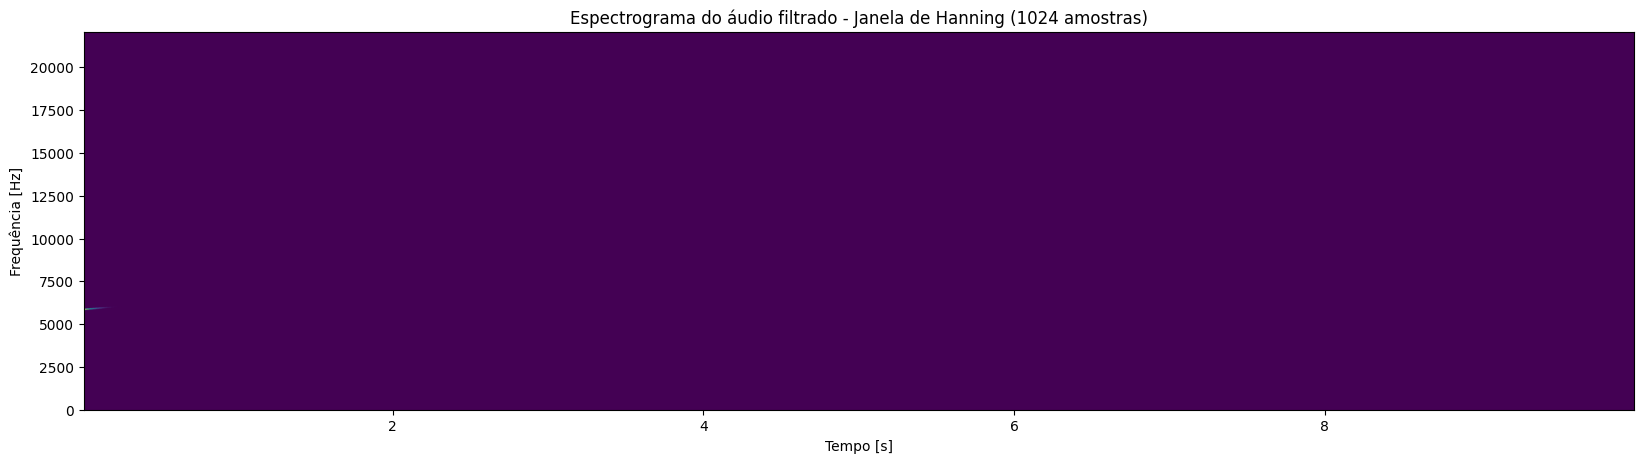

In [172]:
fs = sample_rate
window_size = 1024
window_type = 'hann'

f, t, Sxx = signal.spectrogram(source_audio_L, fs, nperseg=window_size, window=window_type)
figure(num=None, figsize=(20,5), dpi=100, facecolor='w', edgecolor='k')
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')
plt.title(f"Espectrograma do áudio - Janela de Hanning ({window_size} amostras)")
plt.show()


# Aplicando o filtro nos sinais de áudio
filtered_audio_L = signal.lfilter(b_t2, [1.0], source_audio_L)

fs = sample_rate
window_size = 1024
window_type = 'hann'

f, t, Sxx = signal.spectrogram(filtered_audio_L, fs, nperseg=window_size, window=window_type)
figure(num=None, figsize=(20,5), dpi=100, facecolor='w', edgecolor='k')
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')
plt.title(f"Espectrograma do áudio filtrado - Janela de Hanning ({window_size} amostras)")
plt.show()

# Juntando os canais de áudio
output_audio = np.array(filtered_audio_L, dtype=np.int16)

output_file = "./output_filtered_audio2.wav"
wavfile.write(output_file, sample_rate, output_audio.astype(np.int16))
Audio(filename=output_file, autoplay=False)

#### Processamento de áudio no filtro com transformação $Z^{-1} = -z^{-2}$

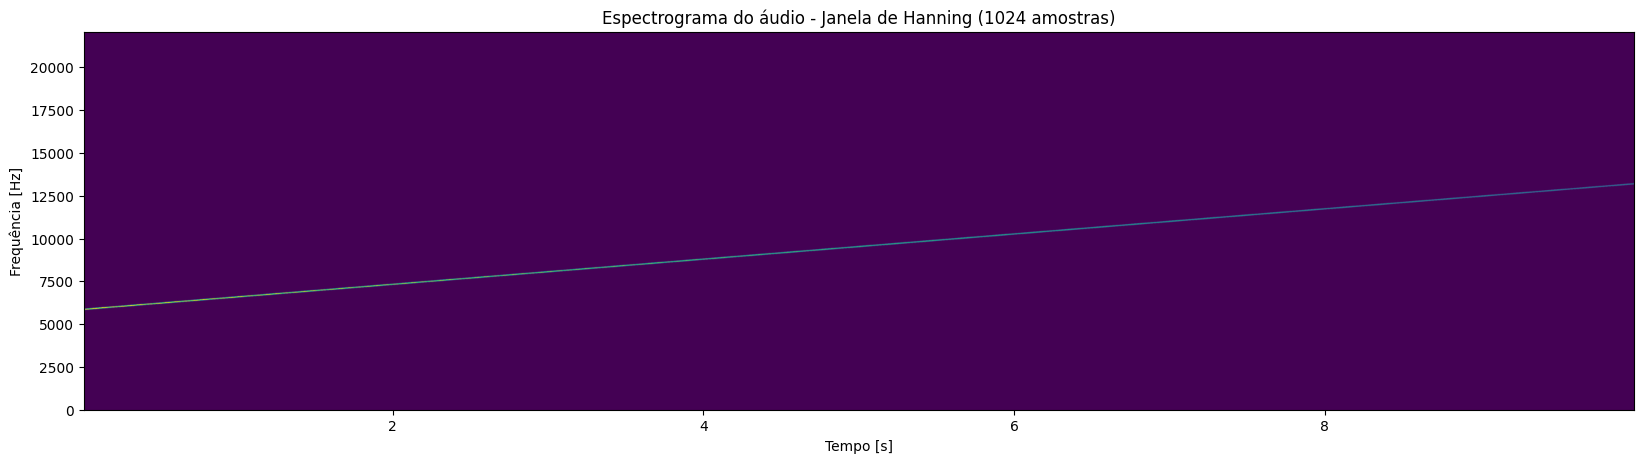

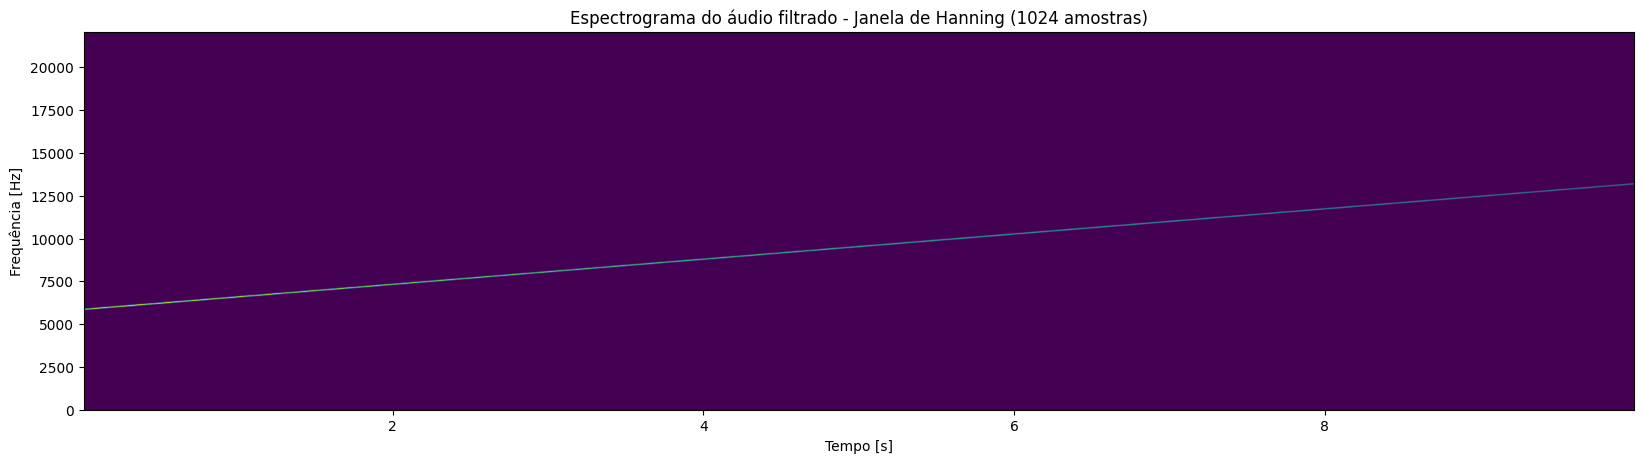

In [171]:
fs = sample_rate
window_size = 1024
window_type = 'hann'

f, t, Sxx = signal.spectrogram(source_audio_L, fs, nperseg=window_size, window=window_type)
figure(num=None, figsize=(20,5), dpi=100, facecolor='w', edgecolor='k')
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')
plt.title(f"Espectrograma do áudio - Janela de Hanning ({window_size} amostras)")
plt.show()


# Aplicando o filtro nos sinais de áudio
filtered_audio_L = signal.lfilter(b_t3, [1.0], source_audio_L)

fs = sample_rate
window_size = 1024
window_type = 'hann'

f, t, Sxx = signal.spectrogram(filtered_audio_L, fs, nperseg=window_size, window=window_type)
figure(num=None, figsize=(20,5), dpi=100, facecolor='w', edgecolor='k')
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')
plt.title(f"Espectrograma do áudio filtrado - Janela de Hanning ({window_size} amostras)")
plt.show()

# Juntando os canais de áudio
output_audio = np.array(filtered_audio_L, dtype=np.int16)

output_file = "./output_filtered_audio3.wav"
wavfile.write(output_file, sample_rate, output_audio.astype(np.int16))
Audio(filename=output_file, autoplay=False)